# Introduction:
Briefly explain the algorithm being explored (e.g., Dijkstra, A*, RRT).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
import seaborn as sns
sns.set_theme()


# Visualization settings
# !pip install seaborn
# Example plot
# plt.plot([0, 1, 2], [0, 1, 4], label="Example Line")
# plt.legend()
# plt.title("Seaborn Styled Plot")
# plt.show()


# Environment Setup:
Define the grid-based environment or graph representation.

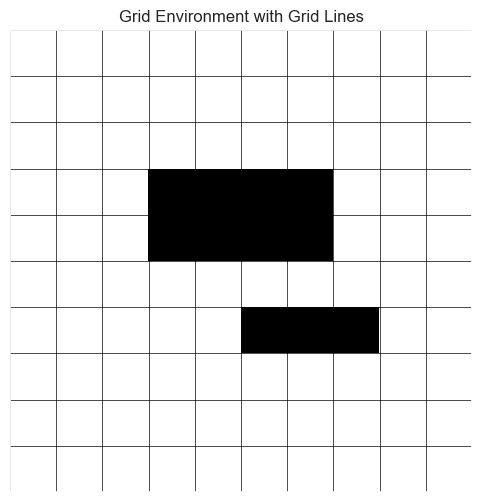

In [32]:
# Create a 10x10 grid environment
grid = np.zeros((10, 10))

# Add obstacles
grid[3:5, 3:7] = 1
grid[6, 5:8] = 1

# Display the environment with grid lines
plt.figure(figsize=(6, 6))
plt.imshow(grid, cmap='Greys', origin='upper')

# Add grid lines
plt.grid(visible=True, which='both', color='black', linewidth=0.5)
plt.xticks(np.arange(-0.5, 10, 1), [])
plt.yticks(np.arange(-0.5, 10, 1), [])

plt.title("Grid Environment with Grid Lines")
plt.show()


# Algorithm Implementation:
Implement the planner algorithm step by step.

In [33]:
def a_star(grid, start, goal):
    rows, cols = grid.shape
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 4-connected grid
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: np.linalg.norm(np.array(start) - np.array(goal))}

    while open_list:
        _, current = heapq.heappop(open_list)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for d in directions:
            neighbor = (current[0] + d[0], current[1] + d[1])
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                tentative_g_score = g_score[current] + 1
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + np.linalg.norm(np.array(neighbor) - np.array(goal))
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))
    return None


In [34]:
import heapq

def dijkstra(grid, start, goal):
    rows, cols = grid.shape
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 4-connected grid
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    cost = {start: 0}

    while open_list:
        current_cost, current = heapq.heappop(open_list)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for d in directions:
            neighbor = (current[0] + d[0], current[1] + d[1])
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                new_cost = cost[current] + 1
                if neighbor not in cost or new_cost < cost[neighbor]:
                    came_from[neighbor] = current
                    cost[neighbor] = new_cost
                    heapq.heappush(open_list, (new_cost, neighbor))
    return None


# Visualization:
Visualize the environment, start, goal, and the planned path.

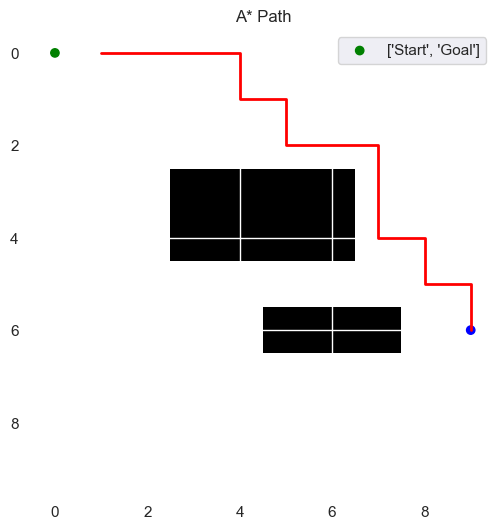

In [35]:
start = (0, 0)
goal = (6, 9)

path = a_star(grid, start, goal)

# Visualization
plt.figure(figsize=(6, 6))
plt.imshow(grid, cmap='Greys', origin='upper')
if path:
    path_coords = np.array(path)
    plt.plot(path_coords[:, 1], path_coords[:, 0], color='red', linewidth=2)
    plt.scatter([start[1], goal[1]], [start[0], goal[0]], color=['green', 'blue'], label=['Start', 'Goal'])
    plt.legend()
plt.title("A* Path")
plt.show()


In [36]:
from ipywidgets import interact

@interact(x_start=(0, 9), y_start=(0, 9), x_goal=(0, 9), y_goal=(0, 9))
def visualize_path(x_start, y_start, x_goal, y_goal):
    start = (x_start, y_start)
    goal = (x_goal, y_goal)
    path = a_star(grid, start, goal)
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap='Greys', origin='upper')
    if path:
        path_coords = np.array(path)
        plt.plot(path_coords[:, 1], path_coords[:, 0], color='red', linewidth=2)
        plt.scatter([start[1], goal[1]], [start[0], goal[0]], color=['green', 'blue'], label=['Start', 'Goal'])
        plt.legend()
    plt.title("A* Path")
    plt.show()


interactive(children=(IntSlider(value=4, description='x_start', max=9), IntSlider(value=4, description='y_star…

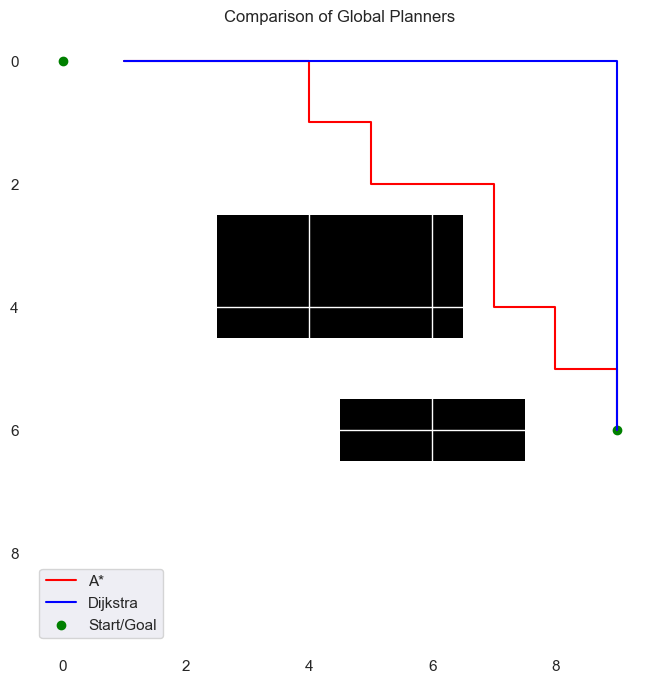

In [37]:
plt.figure(figsize=(8, 8))
plt.imshow(grid, cmap='Greys', origin='upper')

# A* Path
path_a_star = a_star(grid, start, goal)
plt.plot([p[1] for p in path_a_star], [p[0] for p in path_a_star], label="A*", color="red")

# Dijkstra Path
path_dijkstra = dijkstra(grid, start, goal)
plt.plot([p[1] for p in path_dijkstra], [p[0] for p in path_dijkstra], label="Dijkstra", color="blue")

# Add more paths here...

plt.scatter([start[1], goal[1]], [start[0], goal[0]], color="green", label="Start/Goal")
plt.legend()
plt.title("Comparison of Global Planners")
plt.show()


In [38]:
def path_length(path):
    return sum(np.linalg.norm(np.array(path[i]) - np.array(path[i+1])) for i in range(len(path) - 1))
print("A* Path Length:", path_length(path_a_star))
print("Dijkstra Path Length:", path_length(path_dijkstra))
def path_length(path):
    return sum(np.linalg.norm(np.array(path[i]) - np.array(path[i+1])) for i in range(len(path) - 1))
print("A* Path Length:", path_length(path_a_star))
print("Dijkstra Path Length:", path_length(path_dijkstra))


A* Path Length: 14.0
Dijkstra Path Length: 14.0
A* Path Length: 14.0
Dijkstra Path Length: 14.0


In [39]:
import time
start_time = time.time()
path_a_star = a_star(grid, start, goal)
print("A* Time:", time.time() - start_time)


A* Time: 0.0028231143951416016


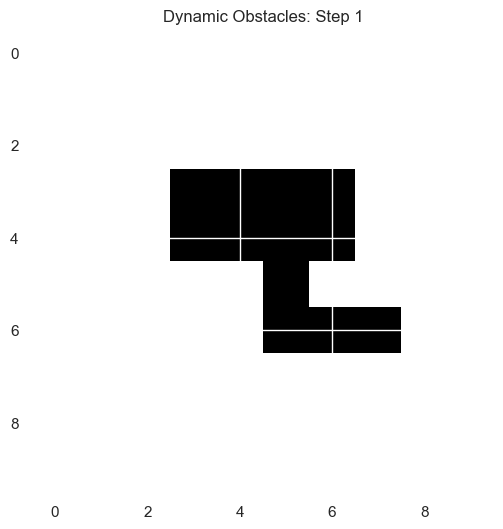

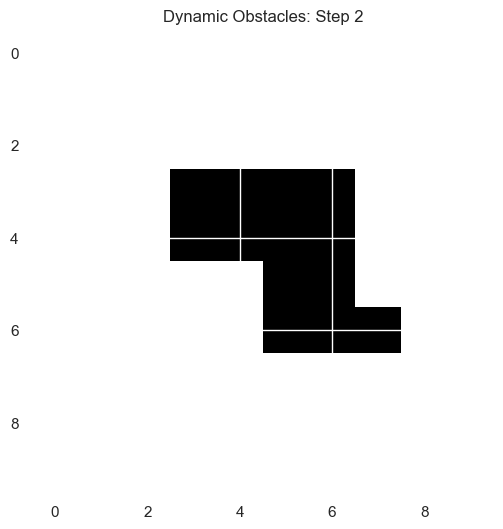

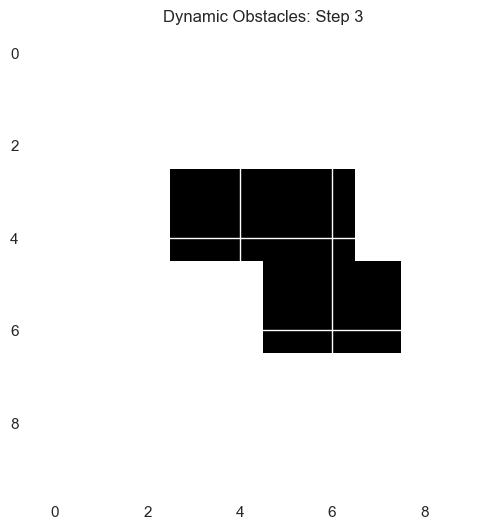

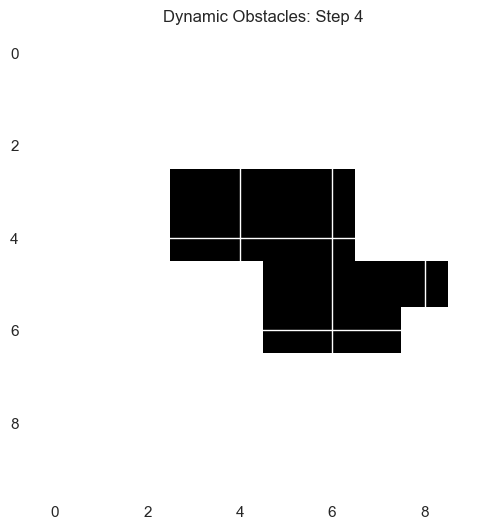

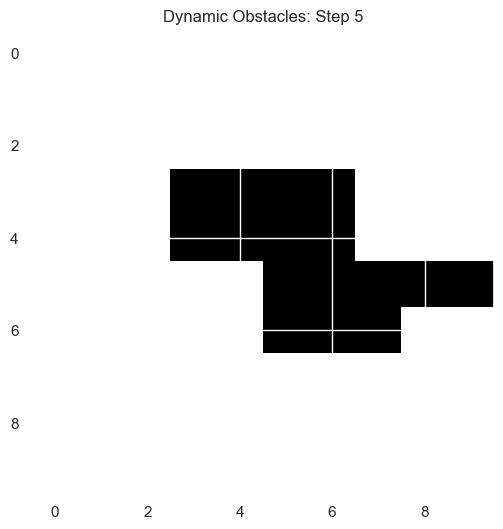

In [40]:
import time
import matplotlib.pyplot as plt

for i in range(5):
    grid[5, 5+i] = 1  # Simulate a moving obstacle
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap='Greys', origin='upper')
    plt.title(f"Dynamic Obstacles: Step {i+1}")
    plt.show()
    time.sleep(1)


Testing for Start: (0, 0), Goal: (9, 9)


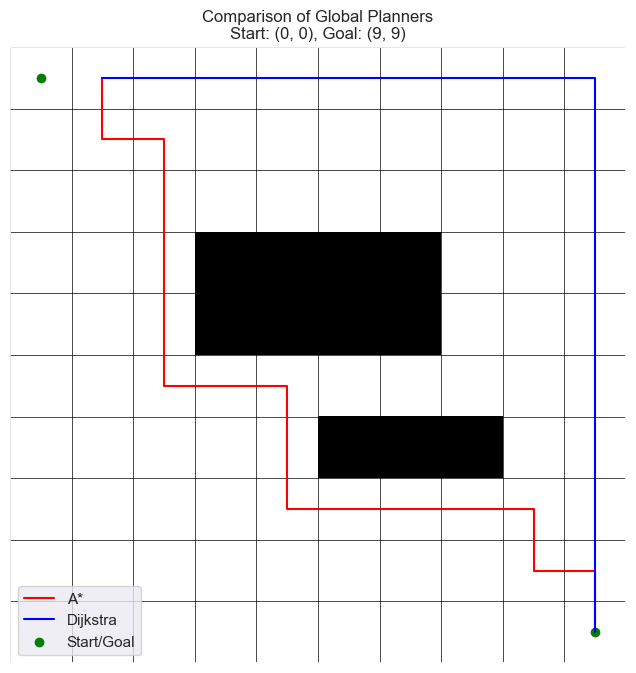

A* Path Length: 17.0
Dijkstra Path Length: 17.0
--------------------------------------------------
Testing for Start: (2, 2), Goal: (8, 8)


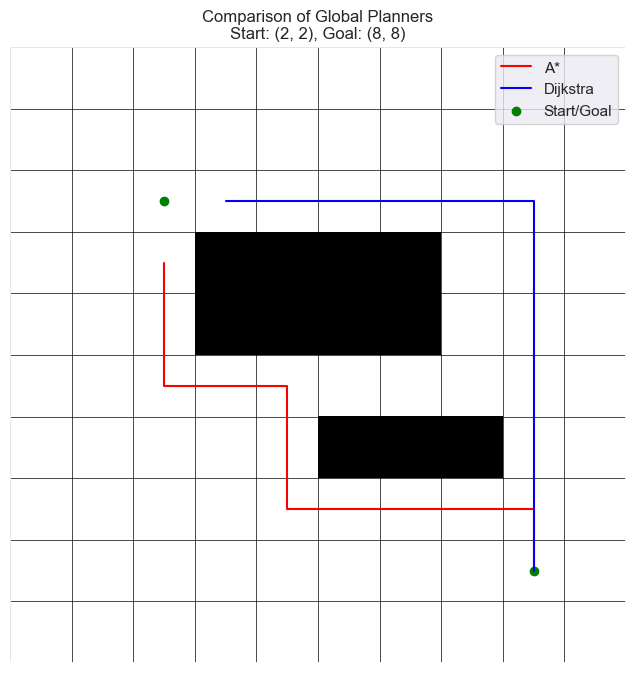

A* Path Length: 11.0
Dijkstra Path Length: 11.0
--------------------------------------------------
Testing for Start: (0, 0), Goal: (5, 5)


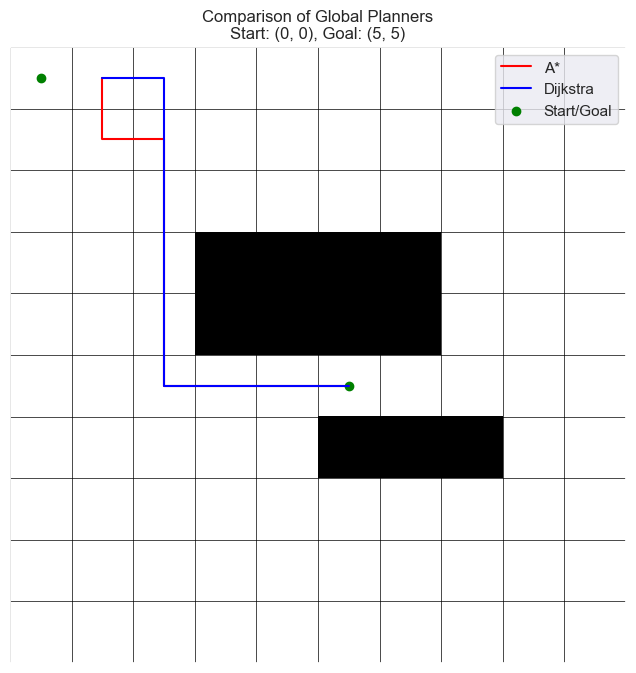

A* Path Length: 9.0
Dijkstra Path Length: 9.0
--------------------------------------------------
Testing for Start: (1, 1), Goal: (7, 7)


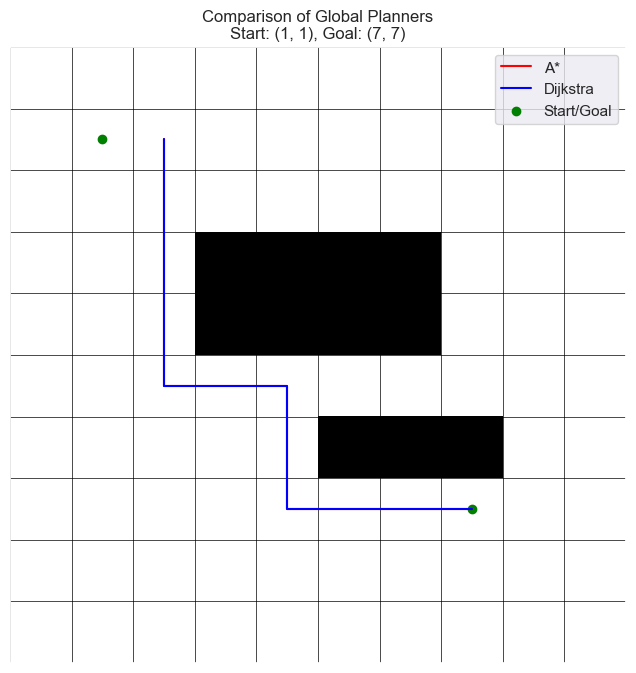

A* Path Length: 11.0
Dijkstra Path Length: 11.0
--------------------------------------------------


In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 10x10 grid environment
grid = np.zeros((10, 10))

# Add obstacles
grid[3:5, 3:7] = 1
grid[6, 5:8] = 1

# Function to test and compare algorithms for given start and goal points
def test_algorithms(start, goal):
    print(f"Testing for Start: {start}, Goal: {goal}")
    
    # A* Path
    path_a_star = a_star(grid, start, goal)
    path_length_a_star = path_length(path_a_star) if path_a_star else "No Path"
    
    # Dijkstra Path
    path_dijkstra = dijkstra(grid, start, goal)
    path_length_dijkstra = path_length(path_dijkstra) if path_dijkstra else "No Path"
    
    # Visualization
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap='Greys', origin='upper')

    # Plot A* Path
    if path_a_star:
        plt.plot([p[1] for p in path_a_star], [p[0] for p in path_a_star], label="A*", color="red")
    
    # Plot Dijkstra Path
    if path_dijkstra:
        plt.plot([p[1] for p in path_dijkstra], [p[0] for p in path_dijkstra], label="Dijkstra", color="blue")
    
    # Plot Start and Goal
    plt.scatter([start[1], goal[1]], [start[0], goal[0]], color="green", label="Start/Goal")
    
    plt.legend()
    plt.title(f"Comparison of Global Planners\nStart: {start}, Goal: {goal}")
    plt.grid(visible=True, which='both', color='black', linewidth=0.5)
    plt.xticks(np.arange(-0.5, 10, 1), [])
    plt.yticks(np.arange(-0.5, 10, 1), [])
    plt.show()

    # Print Results
    print(f"A* Path Length: {path_length_a_star}")
    print(f"Dijkstra Path Length: {path_length_dijkstra}")
    print("-" * 50)

# Helper function to calculate path length
def path_length(path):
    return sum(np.linalg.norm(np.array(path[i]) - np.array(path[i + 1])) for i in range(len(path) - 1))

# Test for multiple start and goal points
start_goal_pairs = [((0, 0), (9, 9)), ((2, 2), (8, 8)), ((0, 0), (5, 5)), ((1, 1), (7, 7))]
for start, goal in start_goal_pairs:
    test_algorithms(start, goal)


Step 1/5:
Testing for Start: (0, 0), Goal: (9, 9)


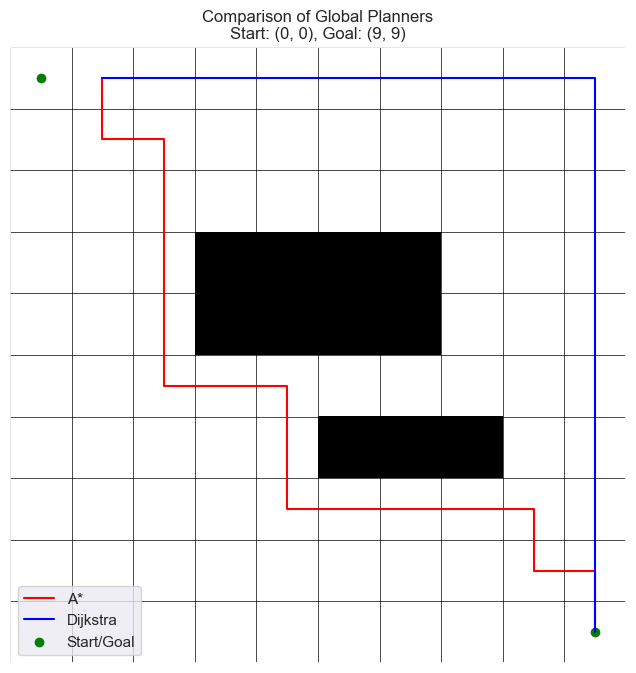

A* Path Length: 17.0
Dijkstra Path Length: 17.0
--------------------------------------------------
Step 2/5:
Testing for Start: (0, 0), Goal: (9, 9)


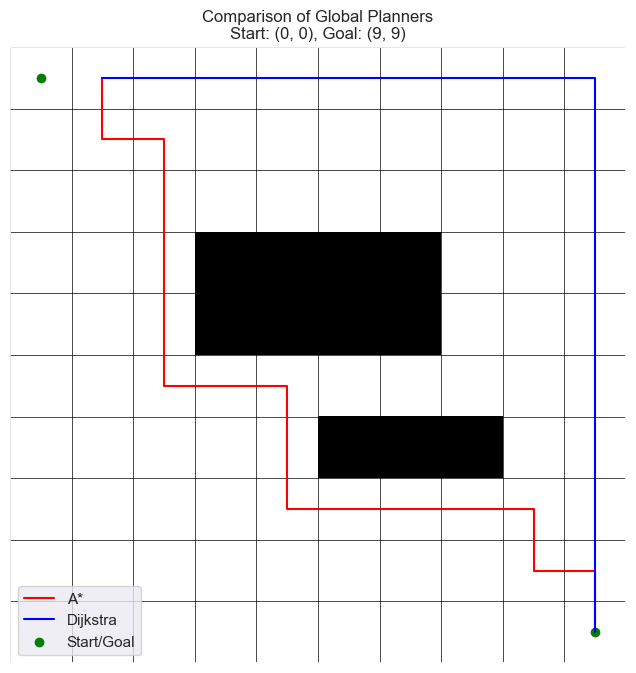

A* Path Length: 17.0
Dijkstra Path Length: 17.0
--------------------------------------------------
Step 3/5:
Testing for Start: (0, 0), Goal: (9, 9)


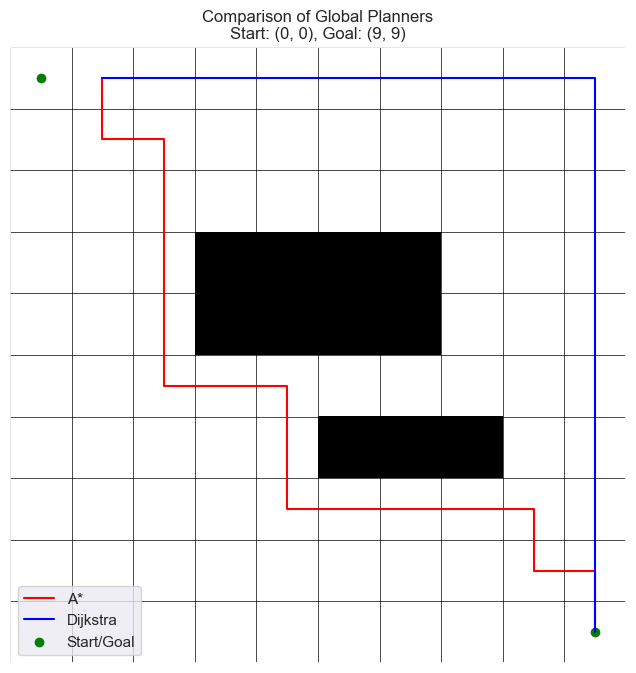

A* Path Length: 17.0
Dijkstra Path Length: 17.0
--------------------------------------------------
Step 4/5:
Testing for Start: (0, 0), Goal: (9, 9)


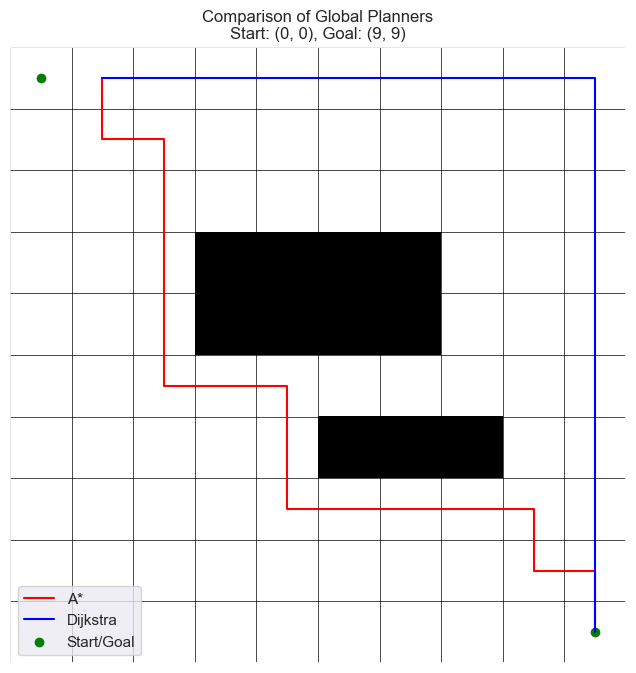

A* Path Length: 17.0
Dijkstra Path Length: 17.0
--------------------------------------------------
Step 5/5:
Testing for Start: (0, 0), Goal: (9, 9)


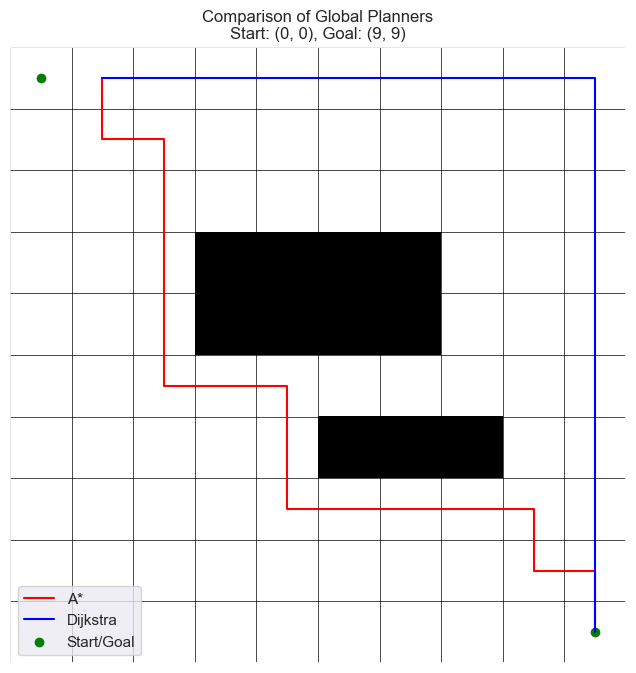

A* Path Length: 17.0
Dijkstra Path Length: 17.0
--------------------------------------------------


In [42]:
import time

# Simulate moving obstacles in the grid
def add_dynamic_obstacles(grid, step):
    grid[3:5, 3 + step:5 + step] = 1  # Moving block horizontally
    grid[6, 5 - step:8 - step] = 1  # Moving block horizontally in the opposite direction

# Dynamic testing
def test_with_dynamic_obstacles(start, goal, steps=5):
    for step in range(steps):
        # Reset grid
        dynamic_grid = np.zeros((10, 10))
        
        # Add dynamic obstacles
        add_dynamic_obstacles(dynamic_grid, step)
        
        # Add static obstacles
        dynamic_grid[4, 4] = 1
        dynamic_grid[5, 5] = 1

        # Test algorithms
        print(f"Step {step + 1}/{steps}:")
        test_algorithms(start, goal)

        # Wait for next step
        time.sleep(1)

# Start and goal points
start = (0, 0)
goal = (9, 9)

# Run dynamic obstacle test
test_with_dynamic_obstacles(start, goal, steps=5)


In [43]:
# Define a cost map
cost_map = np.ones((10, 10))  # Default cost is 1
cost_map[4:6, 4:6] = 10  # High-cost area
cost_map[7, 7] = 5  # Medium-cost cell

# Modify A* and Dijkstra to consider the cost map
def a_star_with_cost(grid, cost_map, start, goal):
    rows, cols = grid.shape
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 4-connected grid
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: cost_map[start] + np.linalg.norm(np.array(start) - np.array(goal))}

    while open_list:
        _, current = heapq.heappop(open_list)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for d in directions:
            neighbor = (current[0] + d[0], current[1] + d[1])
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                tentative_g_score = g_score[current] + cost_map[neighbor]
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + np.linalg.norm(np.array(neighbor) - np.array(goal))
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))
    return None


In [ ]:
import numpy as np
import random

def rrt(start, goal, grid, max_iters=1000, step_size=1):
    rows, cols = grid.shape
    tree = {start: None}  # {node: parent}
    
    for _ in range(max_iters):
        # Randomly sample a point in the grid
        rand_point = (random.randint(0, rows - 1), random.randint(0, cols - 1))
        if grid[rand_point] == 1:  # Skip obstacles
            continue
        
        # Find nearest node in the tree
        nearest = min(tree.keys(), key=lambda n: np.linalg.norm(np.array(n) - np.array(rand_point)))
        
        # Compute direction vector
        direction = np.array(rand_point) - np.array(nearest)
        magnitude = np.linalg.norm(direction)
        
        # Skip if the direction vector has zero magnitude
        if magnitude == 0:
            continue
        
        # Normalize the direction and compute the new point
        norm_dir = direction / magnitude
        new_point = tuple((np.array(nearest) + step_size * norm_dir).astype(int))
        
        # Ensure the new point is within bounds and not in an obstacle
        if 0 <= new_point[0] < rows and 0 <= new_point[1] < cols and grid[new_point] == 0:
            tree[new_point] = nearest
            
            # Check if goal is reached
            if np.linalg.norm(np.array(new_point) - np.array(goal)) < step_size:
                path = []
                current = new_point
                while current is not None:
                    path.append(current)
                    current = tree[current]
                return path[::-1]
    return None


In [ ]:
path_rrt = rrt(start, goal, grid)
if path_rrt:
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap='Greys', origin='upper')
    plt.plot([p[1] for p in path_rrt], [p[0] for p in path_rrt], label="RRT", color="purple")
    plt.scatter([start[1], goal[1]], [start[0], goal[0]], color="green", label="Start/Goal")
    plt.legend()
    plt.title("RRT Path")
    plt.show()
else:
    print("RRT failed to find a path.")
